<b>MOVIE MAYHEM PROJECT</b>

In [29]:
#This is for loading the modules we want to use for the project.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats 

<b>Team Members:</b> 

David Lucey, Matt Midwinter, Tanner Riebel, Roberto Pupo

<b>Project Description / Overview:</b> 

Our goal is to analyze this data set of movies to identify both elements of the movies themselves, and the quality of movies on various platforms.

<b> Dataset Source: </b>

Kaggle

<b>Research Questions to Answer:</b>
1. Do movies aimed at 18+ age have a higher IMDB rating? 
2. What kind of movies (genre) receive higher ratings?
3. Which streaming platform has the highest average ratings?
4. Which decade has the highest ratings (300 movies minimum)?

<b>Hypotheses:</b> 
1. Movies under 18 will have a higher imdb rating (Primary)
2. Movies on Disney plus have the highest ratings of the 4 platforms


In [3]:
#This is for loading the CSV and parsing into a DF
movie_dataset = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
movie_dataset

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [4]:
movie_dataset = movie_dataset.set_index('ID')
movie_dataset = movie_dataset.drop(['Unnamed: 0', 'Type'], axis=1)

#Checked to see how many rows would be lost with dropping movies withour Rotten Tomatoe scores, 
#we saw it would reduce our dataset by about 11,000 rows and decided to utilize just IMDb

movie_dataset = movie_dataset.drop(['Rotten Tomatoes'], axis=1)
movie_dataset

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN


In [5]:
# This block is for the team's questions

<b>Question:</b> Do movies aimed at 18+ age have a higher IMDB rating?

In [6]:
#Cleaning the data for the age analysis
movie_dataset_age_data = movie_dataset.copy()
movie_dataset_age_data_clean = movie_dataset_age_data.dropna(subset=['Age', 'IMDb'])
movie_dataset_age_data_clean

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0


In [7]:
# Creating column to compare over 18 vs under 18 movies
movie_dataset_age_data_clean['Age Range'] = np.where(movie_dataset_age_data_clean['Age'] == '18+', '18+', 'Under 18')

# Didn't end up needed group by had to parse out data seperately
movie_dataset_age_data_clean_groupby = movie_dataset_age_data_clean.groupby('Age Range')[['IMDb']].mean()
movie_dataset_age_data_clean_groupby


over_18 = movie_dataset_age_data_clean.loc[movie_dataset_age_data_clean['Age Range'] == '18+', 'IMDb']
under_18 = movie_dataset_age_data_clean.loc[movie_dataset_age_data_clean['Age Range'] != '18+', 'IMDb']


<ipython-input-7-f3f521251126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataset_age_data_clean['Age Range'] = np.where(movie_dataset_age_data_clean['Age'] == '18+', '18+', 'Under 18')


<ipython-input-8-6a5430e8baf7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Over 18', 'Under 18'])


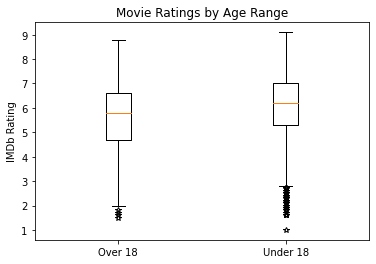

Based on the boxplot we've uncovered many outliers among both age ranges.
We will run a two Hypothesis test. 1 including outliers and 1 not including outliers


In [8]:
# Checking for outliers in Age Range data

age_range_data = [over_18, under_18]

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(['Over 18', 'Under 18'])
ax1.set_ylabel("IMDb Rating")
ax1.set_title("Movie Ratings by Age Range")
ax1.boxplot(age_range_data, 0, '*')
plt.show()

print("Based on the boxplot we've uncovered many outliers among both age ranges.") 
print('We will run a two Hypothesis test. 1 including outliers and 1 not including outliers')



In [9]:
# First Age Range Hypothesis Test

# Null Hypothesis: There is no difference in IMDb ratings based on age

print('Our hypothesis is that under 18 will have higher ratings then over 18')

print('We construct a null hypothesis that states there is no difference in ratings based on age')

print("We test this null hypothesis with a Student's t-test")


print('p-value: ' +str(stats.ttest_ind(over_18, under_18, equal_var=False)[1]))

print('----------------------------------')

print('Based on the p-value, we see that the difference in ratings is statistically significant.')

print('We now believe under 18 IMDb ratings are higher than Over 18')

# Increases our confidence that under 18 has higher ratings then over 18
                

Our hypothesis is that under 18 will have higher ratings then over 18
We construct a null hypothesis that states there is no difference in ratings based on age
We test this null hypothesis with a Student's t-test
p-value: 1.7906252820190408e-48
----------------------------------
Based on the p-value, we see that the difference in ratings is statistically significant.
We now believe under 18 IMDb ratings are higher than Over 18


In [10]:
# Second Age Range Hypothesis Test, removing outliers

over_18_quartiles = over_18.quantile([.25,.5,.75])
over_18_lowerq = over_18_quartiles[0.25]
over_18_upperq = over_18_quartiles[0.75]
over_18_iqr = over_18_upperq-over_18_lowerq

over_18_lower_bound = over_18_lowerq - (1.5*over_18_iqr)
over_18_upper_bound = over_18_upperq + (1.5*over_18_iqr)

over_18_df = over_18.to_frame()


filtered_over18_df = over_18_df.loc[(over_18_df['IMDb'] >= over_18_lower_bound) & (over_18_df['IMDb'] <= over_18_upper_bound)]

filtered_over18_df.head()

,IMDb
ID,
2,8.7
5,8.8
7,8.5
8,8.4
10,8.3


In [11]:
# Second Age Range Hypothesis Test, removing outliers
under_18_quartiles = under_18.quantile([.25,.5,.75])
under_18_lowerq = under_18_quartiles[0.25]
under_18_upperq = under_18_quartiles[0.75]
under_18_iqr = under_18_upperq-under_18_lowerq

under_18_lower_bound = under_18_lowerq - (1.5*under_18_iqr)
under_18_upper_bound = under_18_upperq + (1.5*under_18_iqr)

under_18_df = under_18.to_frame()


filtered_under18_df = under_18_df.loc[(under_18_df['IMDb'] >= under_18_lower_bound) & (under_18_df['IMDb'] <= under_18_upper_bound)]

filtered_under18_df.head()

,IMDb
ID,
1,8.8
3,8.5
4,8.5
6,8.4
9,8.4


In [12]:
# Second Age Range Hypothesis Test

# Null Hypothesis: There is no difference in IMDb ratings based on age

print('Our hypothesis is that under 18 will have higher ratings then over 18')

print('We construct a null hypothesis that states there is no difference in ratings based on age')

print("We test this null hypothesis with a Student's t-test")


print('p-value: ' +str(stats.ttest_ind(filtered_over18_df, filtered_under18_df, equal_var=False)[1]))

print('----------------------------------')

print('Based on the p-value, we see that the difference in ratings is statistically significant.')

print('We now believe under 18 IMDb ratings are higher than Over 18')

# Increases our confidence that under 18 has higher ratings then over 18
                

Our hypothesis is that under 18 will have higher ratings then over 18
We construct a null hypothesis that states there is no difference in ratings based on age
We test this null hypothesis with a Student's t-test
p-value: [8.31323997e-63]
----------------------------------
Based on the p-value, we see that the difference in ratings is statistically significant.
We now believe under 18 IMDb ratings are higher than Over 18


In [13]:
#This block is for Robertos Code

In [14]:
# My own copy of the original Data
robertos_dataset = movie_dataset.copy()
robertos_dataset

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN


In [15]:
#robertos_dataset.columns
# Selecting only ID, IMDb, Genres columns
robertos_dataset_simplified = robertos_dataset[["Title","IMDb","Genres"]]
# robertos_dataset.str.split(',', expand=True)
# robertos_dataset
#robertos_dataset_simplified
print(f"robertos_dataset_simplified={robertos_dataset_simplified.size}")
robertos_dataset_cleaned = robertos_dataset_simplified.dropna(how='any')
print(f"robertos_dataset_cleaned={robertos_dataset_cleaned.size}")

robertos_dataset_simplified=50232
robertos_dataset_cleaned=48216


In [16]:
#Creating a new dataframe containing every movie with one genre per row
robertos_dataset_one_genre_by_movie = pd.DataFrame(columns = ['Title', 'IMDb', 'Genre']) 
# For each row in original df split Genres column by ',' and create a new row per genre per movie
for index, row in robertos_dataset_cleaned.iterrows():
    list_of_genres = row["Genres"].split(",")
    for genre in list_of_genres:
        new_row = {'Title':row.Title, 'IMDb': row.IMDb, 'Genre': genre.strip()}
        robertos_dataset_one_genre_by_movie = robertos_dataset_one_genre_by_movie.append(new_row, ignore_index=True)
        # print(f"genre --{genre}--{robertos_dataset_one_genre_by_movie.index}")

robertos_dataset_one_genre_by_movie['Genre'].replace('',np.nan, inplace=True)

robertos_dataset_one_genre_by_movie.dropna(how='any', inplace=True)
robertos_dataset_one_genre_by_movie

,Title,IMDb,Genre
0,Inception,8.8,Action
1,Inception,8.8,Adventure
2,Inception,8.8,Sci-Fi
3,Inception,8.8,Thriller
4,The Matrix,8.7,Action
...,...,...,...
38371,The Poof Point,4.7,Comedy
38372,The Poof Point,4.7,Family
38373,The Poof Point,4.7,Sci-Fi
38374,Sharks of Lost Island,5.7,Documentary


In [17]:
robertos_dataset_one_genre_by_movie

,Title,IMDb,Genre
0,Inception,8.8,Action
1,Inception,8.8,Adventure
2,Inception,8.8,Sci-Fi
3,Inception,8.8,Thriller
4,The Matrix,8.7,Action
...,...,...,...
38371,The Poof Point,4.7,Comedy
38372,The Poof Point,4.7,Family
38373,The Poof Point,4.7,Sci-Fi
38374,Sharks of Lost Island,5.7,Documentary


In [18]:
robertos_dataset_grouped = robertos_dataset_one_genre_by_movie.groupby(by=["Genre"]).mean()
robertos_dataset_grouped.sort_values(by=["IMDb"], ascending=False)

,IMDb
Genre,
News,7.109901
Documentary,6.942612
Biography,6.808674
History,6.731746
Music,6.600000
Short,6.441228
Sport,6.417857
Film-Noir,6.332911
Animation,6.252129


In [19]:
# Assigning Genres
news = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'News', 'IMDb']
documentary = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Documentary', 'IMDb']
biography = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Biography', 'IMDb']
history = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'History', 'IMDb']
music = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Music', 'IMDb']
short = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Short', 'IMDb']
sport = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Sport', 'IMDb']
film_Noir = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Film-Noir', 'IMDb']
animation = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Animation', 'IMDb']
war = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'War', 'IMDb']
musical = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Musical', 'IMDb']
game_Show = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Game-Show', 'IMDb']
drama = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Drama', 'IMDb']
romance = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Romance', 'IMDb']
family = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Family', 'IMDb']

comedy = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Comedy', 'IMDb']
western = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Western', 'IMDb']
crime = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Crime', 'IMDb']
talk_Show = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Talk-Show', 'IMDb']
fantasy = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Fantasy', 'IMDb']
mystery = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Mystery', 'IMDb']
adventure = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Genre'] == 'Adventure', 'IMDb']
# reality_TV = robertos_dataset_one_genre_by_movie.loc[robertos_dataset_one_genre_by_movie['Reality-TV'] == 'Short', 'IMDb']


<ipython-input-20-92e15a3b5f25>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['News', 'Documentary'])


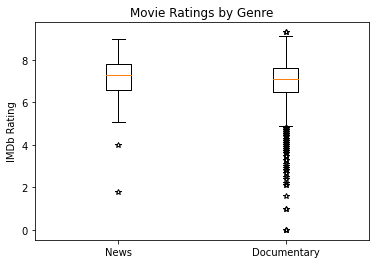

Based on the boxplot we've uncovered many outliers among both age ranges.
We will run a two Hypothesis test. 1 including outliers and 1 not including outliers


In [20]:
genre_range_data = [news, documentary]

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(['News', 'Documentary'])
ax1.set_ylabel("IMDb Rating")
ax1.set_title("Movie Ratings by Genre")
ax1.boxplot(genre_range_data, 0, '*')
plt.show()

print("Based on the boxplot we've uncovered many outliers among both genres") 
print('We will run a two Hypothesis test. 1 including outliers and 1 not including outliers')

In [21]:
#This block is for Tanners code

<b>Question:</b> Do movies on multiple streaming platforms have higher IMDb ratings?


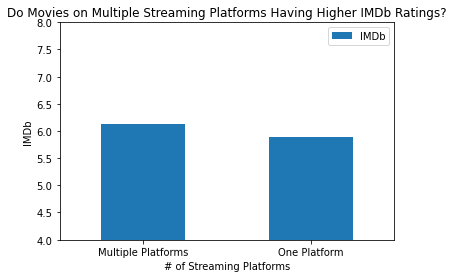

                                 IMDb
Multiple Steaming Platforms          
Multiple Platforms           6.134084
One Platform                 5.893499


In [22]:
platforms_df = movie_dataset.copy()

platforms_df['No. Streaming Platforms'] = platforms_df['Netflix']+platforms_df['Hulu']+platforms_df['Disney+']+platforms_df['Prime Video']
platforms_df['Multiple Steaming Platforms'] = np.where(platforms_df['No. Streaming Platforms'] == 1, 'One Platform', 'Multiple Platforms')

platforms_groupby = platforms_df.groupby('Multiple Steaming Platforms')[['IMDb']].mean()


platforms_groupby.plot(kind='bar', rot=.1)
plt.title('Do Movies on Multiple Streaming Platforms Having Higher IMDb Ratings?')
plt.ylabel('IMDb')
plt.xlabel('# of Streaming Platforms')
plt.ylim(4,8)

plt.show()

print(platforms_groupby)


#### NOTES ####

# Based on this graph it's looking like there's not a huge difference in average IMDb rating if movies 
# have been on multiple platforms vs just one platform



<b>Question:</b> Which streaming platform has the highest average ratings? 

In [23]:
#This block is for Davids code

# dropping NAN's from IMDb column to allow data to be worked.
stream_dataset = movie_dataset.copy()
stream_dataset_clean = stream_dataset.dropna(subset=['IMDb'])
disney_df = stream_dataset_clean.loc[stream_dataset_clean["Disney+"] == 1, :]
disney_clean = stream_dataset_clean.loc[stream_dataset_clean['Disney+'] == 1, 'IMDb']
disney_avg = disney_df["IMDb"].mean()
netflix_df = stream_dataset_clean.loc[stream_dataset_clean["Netflix"] == 1, :]
netflix_clean = stream_dataset_clean.loc[stream_dataset_clean['Netflix'] == 1, 'IMDb']
netflix_avg = netflix_df["IMDb"].mean()
hulu_df = stream_dataset_clean.loc[stream_dataset_clean["Hulu"] == 1, :]
hulu_clean = stream_dataset_clean.loc[stream_dataset_clean['Hulu'] == 1, 'IMDb']
hulu_avg = hulu_df["IMDb"].mean()
prime_df = stream_dataset_clean.loc[stream_dataset_clean["Prime Video"] == 1, :]
prime_clean = stream_dataset_clean.loc[stream_dataset_clean['Prime Video'] == 1, 'IMDb']
prime_avg = prime_df["IMDb"].mean()

Services = ["Disney+", "Netflix", "Hulu", "Prime Video"]
services_avg = [disney_avg, netflix_avg, hulu_avg, prime_avg]
x_axis = np.arange(len(services_avg))

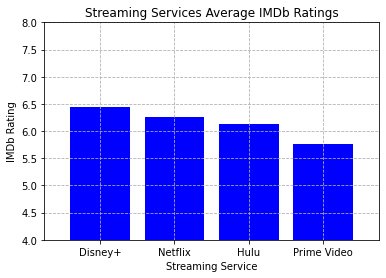

         0        1        2            3
0  Disney+  Netflix     Hulu  Prime Video
1  6.44139  6.25296  6.13812      5.77091


In [24]:
# Graphing outcome
plt.bar(x_axis, services_avg, color="b", align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(4, 8)
plt.title("Streaming Services Average IMDb Ratings")
plt.xlabel("Streaming Service")
plt.ylabel("IMDb Rating")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Services)
plt.locator_params(axis='y', nbins=10)
plt.grid(linestyle='--')
plt.show()

services_summary = [Services, services_avg]

services_summary_df = pd.DataFrame(services_summary)

print(services_summary_df)



<ipython-input-25-bbaf83bbd3e9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Disney+', 'Netflix', 'Hulu', 'Prime Video'])


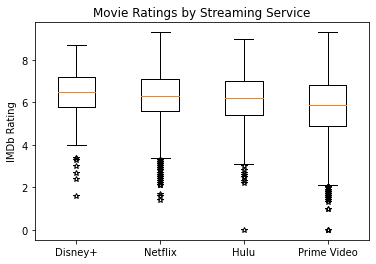

This shows that Disney+ has the highest rating
But if outliers where removed then a different service might have a higher average IMDb score.


In [25]:
services_data = [disney_clean, netflix_clean, hulu_clean, prime_clean]

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(['Disney+', 'Netflix', 'Hulu', 'Prime Video'])
ax1.set_ylabel("IMDb Rating")
ax1.set_title("Movie Ratings by Streaming Service")
ax1.boxplot(services_data, 0, '*')
plt.show()
print("This shows that Disney+ has the highest rating")
print("But if outliers where removed then a different service might have a higher average IMDb score.")

In [26]:
#This block is for Matts code

<ipython-input-27-d0af0dc26029>:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(decades)


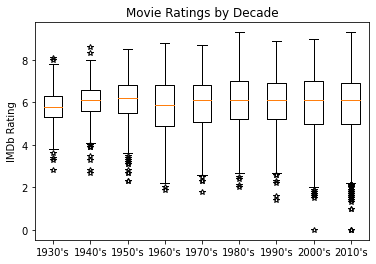

p-value: F_onewayResult(statistic=4.19584979128041, pvalue=4.925355622713826e-05)


In [27]:
#The hypothesis for this test is that movie ratings will have a recency bias based on decade. 
#That decade a movie is made in has no bearing on the ratings of that movie


#After reviewing the data, we decided we needed to ensure that a decade had at least 300 movies in it
#this exluded decades before 1930, we also wanted to exclude 2020 and 2021 since that isnt a complete decade.


#First we copied our dataframe, then we dropped years before 1930 and after 2019
decades_df = movie_dataset.copy()
decades_clean_df = decades_df.dropna(subset=['IMDb'])
decades_clean_df = decades_clean_df[decades_clean_df['Year'] > 1930]
decades_clean_df = decades_clean_df[decades_clean_df['Year'] < 2020]

#Then we assigned the ranges for each decade
conditions = [
    (decades_clean_df['Year'] >= 1930) & (decades_clean_df['Year'] < 1940),
    (decades_clean_df['Year'] >= 1940) & (decades_clean_df['Year'] < 1950),
    (decades_clean_df['Year'] >= 1950) & (decades_clean_df['Year'] < 1960),
    (decades_clean_df['Year'] >= 1960) & (decades_clean_df['Year'] < 1970),
    (decades_clean_df['Year'] >= 1970) & (decades_clean_df['Year'] < 1980),
    (decades_clean_df['Year'] >= 1980) & (decades_clean_df['Year'] < 1990),
    (decades_clean_df['Year'] >= 1990) & (decades_clean_df['Year'] < 2000),
    (decades_clean_df['Year'] >= 2000) & (decades_clean_df['Year'] < 2010),
    (decades_clean_df['Year'] >= 2010) & (decades_clean_df['Year'] < 2020)
]

#And then created the labels for those decades.
decades = ["1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]

#Then we added a decades column to our dataframe
decades_clean_df['Decade'] = np.select(conditions, decades)
#decades_clean_df = decades_clean_df[decades_clean_df['Decade'] != 0]

#And made a dataframe grouped by the decades
decades_grouped_df = decades_clean_df.groupby('Decade')[('IMDb')].mean()

#To better plot the data i turned each decade into its own list.
IMDb_data_1930 = decades_clean_df[decades_clean_df['Decade'] == "1930's"]
IMDb_data_1940 = decades_clean_df[decades_clean_df['Decade'] == "1940's"]
IMDb_data_1950 = decades_clean_df[decades_clean_df['Decade'] == "1950's"]
IMDb_data_1960 = decades_clean_df[decades_clean_df['Decade'] == "1960's"]
IMDb_data_1970 = decades_clean_df[decades_clean_df['Decade'] == "1970's"]
IMDb_data_1980 = decades_clean_df[decades_clean_df['Decade'] == "1980's"]
IMDb_data_1990 = decades_clean_df[decades_clean_df['Decade'] == "1990's"]
IMDb_data_2000 = decades_clean_df[decades_clean_df['Decade'] == "2000's"]
IMDb_data_2010 = decades_clean_df[decades_clean_df['Decade'] == "2010's"]

IMDb_data_1930 = IMDb_data_1930['IMDb'].tolist()
IMDb_data_1940 = IMDb_data_1940['IMDb'].tolist()
IMDb_data_1950 = IMDb_data_1950['IMDb'].tolist()
IMDb_data_1960 = IMDb_data_1960['IMDb'].tolist()
IMDb_data_1970 = IMDb_data_1970['IMDb'].tolist()
IMDb_data_1980 = IMDb_data_1980['IMDb'].tolist()
IMDb_data_1990 = IMDb_data_1990['IMDb'].tolist()
IMDb_data_2000 = IMDb_data_2000['IMDb'].tolist()
IMDb_data_2010 = IMDb_data_2010['IMDb'].tolist()

decade_data = [IMDb_data_1930, IMDb_data_1940, IMDb_data_1950, IMDb_data_1960, IMDb_data_1970,
               IMDb_data_1980, IMDb_data_1990, IMDb_data_2000, IMDb_data_2010]

#Then we plotted a box plot to get a better visualization of our data.
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(decades)
ax1.set_ylabel("IMDb Rating")
ax1.set_title("Movie Ratings by Decade")
ax1.boxplot(decade_data, 0, '*')
plt.show()

#Next we ran a anova test to try to disprove our null hypothesis
stats.f_oneway(IMDb_data_1930, IMDb_data_1940, IMDb_data_1950, IMDb_data_1960, IMDb_data_1970,
               IMDb_data_1980, IMDb_data_1990, IMDb_data_2000, IMDb_data_2010) 

print('p-value: ' +str(stats.f_oneway(IMDb_data_1930, IMDb_data_1940, IMDb_data_1950, IMDb_data_1960, IMDb_data_1970,
               IMDb_data_1980, IMDb_data_1990, IMDb_data_2000, IMDb_data_2010)))

#Based on the anova test we ran, we can disprove the null hypothesis that the decade a movie was released in has no bearing on its review score.

